In [1]:
import pandas as pd
df = pd.read_csv('merged_file.csv')
X = df.drop(columns=['women_proportion'])
y = df['women_proportion'] 

In [2]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
df['description'] = df['description'].fillna('')
vectorizer = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer.fit_transform(df['description'])

In [7]:
from sklearn.preprocessing import OneHotEncoder

# 选择要编码的字段
df['description'] = df['description'].fillna('')
vectorizer = TfidfVectorizer(max_features=500)
X_tfidf = vectorizer.fit_transform(df['description'])
categorical_cols = ['company_name', 'position_name', 'language','education','experience','personality']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_categorical = encoder.fit_transform(df[categorical_cols])

# 数值型字段
X_numeric = df[['women_proportion']].values
X = hstack([X_tfidf, sparse.csr_matrix(X_categorical), sparse.csr_matrix(X_numeric)])

In [8]:
from scipy.sparse import hstack

# 把稀疏矩阵和 dense 矩阵拼接
from scipy import sparse

X = hstack([X_tfidf, sparse.csr_matrix(X_categorical), sparse.csr_matrix(X_numeric)])

In [9]:
y = df['women_proportion']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
y_pred = model.predict(X_test)

In [37]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.4f}")


RMSE: 0.0058


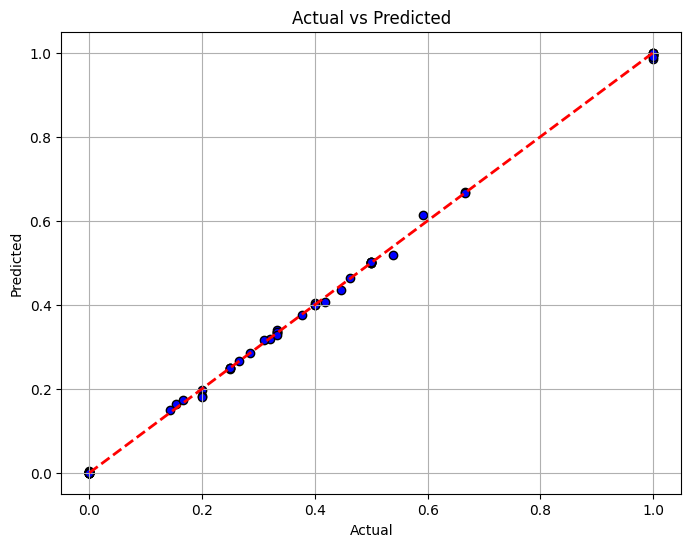

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()